<a href="https://colab.research.google.com/github/Khanarfan1234/CodeAlpha_Titanic_Classification/blob/main/Predictive_modelling_with_linera_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Task 3**

**Predictive Modeling with Linear Regression**

Build a predictive model using linear regression to
predict a numerical outcome based on one or more
features. Use a dataset with a continuous target
variable.
(We used DistanceBraking of car Dataset)

Import Libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

**Load the Dataset**



In [7]:
import pandas as pd

# Load the dataset
file_path = 'BrakingDistance.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()


,speed,dist
0,4,2
1,4,10
2,7,4
3,7,22
4,8,16


In [8]:
# Get summary statistics of the dataset
print(data.describe())

# Check for missing values
print(data.isnull().sum())

# Get information about the dataset
print(data.info())

           speed        dist
count  50.000000   50.000000
mean   15.400000   42.980000
std     5.287644   25.769377
min     4.000000    2.000000
25%    12.000000   26.000000
50%    15.000000   36.000000
75%    19.000000   56.000000
max    25.000000  120.000000
speed    0
dist     0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   speed   50 non-null     int64
 1   dist    50 non-null     int64
dtypes: int64(2)
memory usage: 928.0 bytes
None


**Exploratory DataAnalysis( EDA )**

Visualize the distribution of the data

   speed  dist
0      4     2
1      4    10
2      7     4
3      7    22
4      8    16


<ipython-input-22-35a667ee9db6>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['dist'])  # Replace 'DistanceBraking' with 'dist'


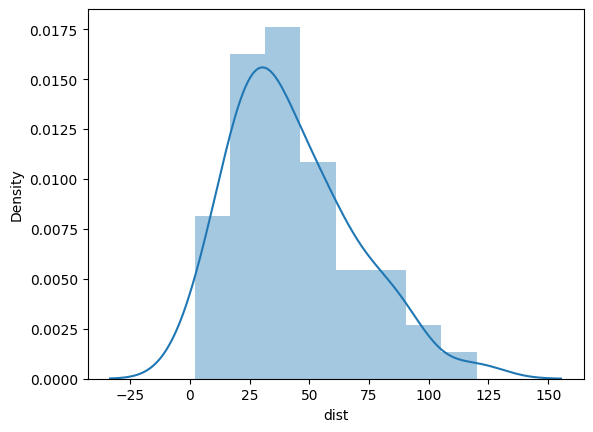

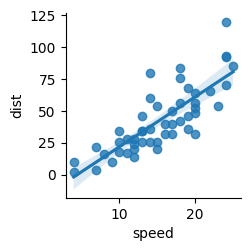

dist     1.000000
speed    0.806895
Name: dist, dtype: float64


In [22]:

# Display the first few rows of the dataset to check column names
print(data.head())

# Assuming the correct column name is 'dist' based on global variables
sns.distplot(data['dist'])  # Replace 'DistanceBraking' with 'dist'
plt.show()

# Visualize the relationship between the features and the target variable
# Adjust column names as needed
sns.pairplot(data, x_vars=['speed'], y_vars=['dist'], kind='reg')
plt.show()

# Calculate the correlation
correlation_matrix = data.corr()
print(correlation_matrix['dist'].sort_values(ascending=False)) # Replace 'DistanceBraking' with 'dist'

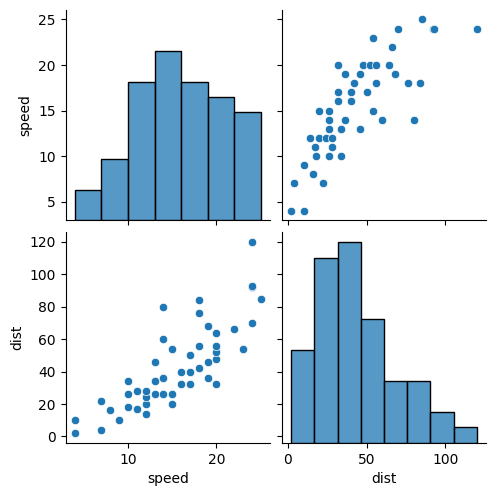

          speed      dist
speed  1.000000  0.806895
dist   0.806895  1.000000


In [28]:

# Explore relationships between features using scatter plots
sns.pairplot(data, kind="scatter")
plt.show()

# Calculate correlation coefficients between features
correlation_matrix = data.corr()
print(correlation_matrix)


**Check for Correlation**

          speed      dist
speed  1.000000  0.806895
dist   0.806895  1.000000


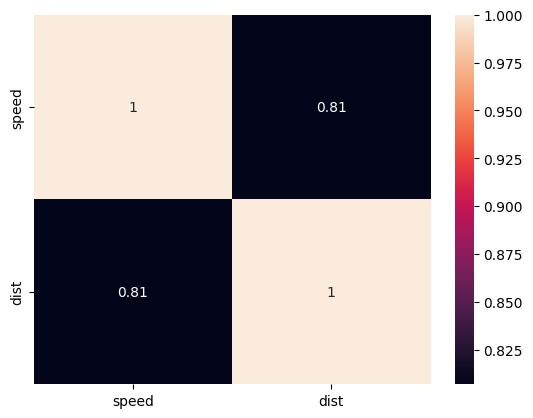

In [29]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Display the correlation matrix
print(correlation_matrix)

# Visualize the correlation matrix
sns.heatmap(correlation_matrix, annot=True)
plt.show()


**Identify and Handle Outliers**

Number of outliers: 0
Empty DataFrame
Columns: [speed, dist]
Index: []
Shape of data after removing outliers: (50, 2)


<ipython-input-33-dafba28cac77>:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_without_outliers['dist'])  # Replace 'DistanceBraking' with 'dist'


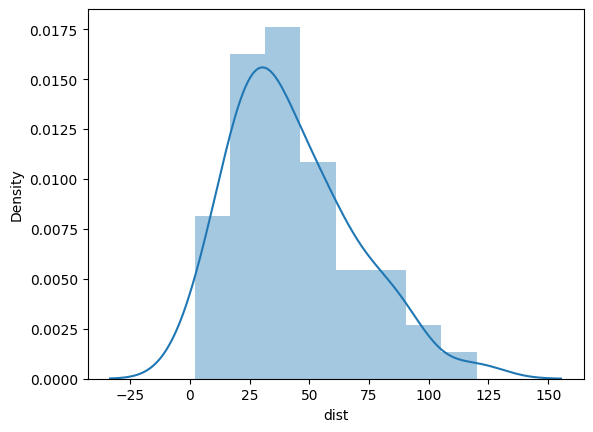

In [33]:
# prompt: Identify and Handle Outliers

# Identify outliers using z-score
z_scores = (data['dist'] - data['dist'].mean()) / data['dist'].std()
outliers = data[abs(z_scores) > 3]

# Handle outliers by removing them
data_filtered = data.drop(outliers.index)

# Check the shape of the data after removing outliers
print(data_filtered.shape)

# Visualize the distribution of the data after removing outliers
sns.distplot(data_filtered['dist'])
plt.show()


Split data into Training and testing dataset

In [47]:
#Split the Data into Training and Testing Sets

# Split the data into training and testing sets
X = data_filtered[['speed']]  # Replace 'speed' with the actual feature name
y = data_filtered['dist']  # Replace 'dist' with the actual target variable name
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")


Shape of X_train: (40, 1)
Shape of X_test: (10, 1)
Shape of y_train: (40,)
Shape of y_test: (10,)


**Train a Linear Regression Model**

Model coefficients: [3.68568726]
Model intercept: -14.133882307411135
Mean squared error: 275.4289828774239
R-squared score: 0.6157734182280231


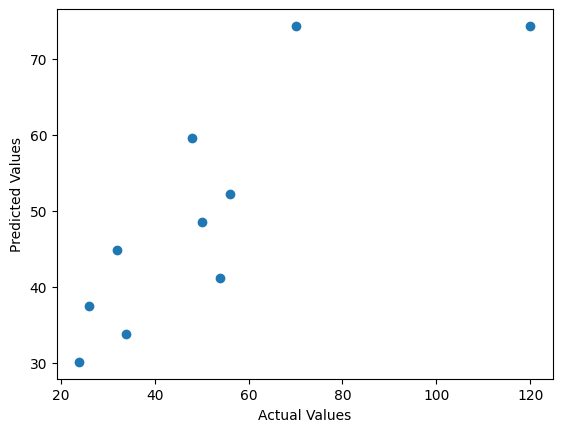

['linear_regression_model.joblib']

In [52]:
#  Train a Linear Regression Model

# Create a linear regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Print the model coefficients and intercept
print(f"Model coefficients: {model.coef_}")
print(f"Model intercept: {model.intercept_}")

# Evaluate the model on the test data
y_pred = model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

# Calculate the R-squared score
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Mean squared error: {mse}")
print(f"R-squared score: {r2}")

# Visualize the predicted values against the actual values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

# Save the model for later use
joblib.dump(model, "linear_regression_model.joblib")


**Make Predictions**

In [61]:
# Make predictions on the testing data

# Make predictions on the test data
y_pred = model.predict(X_test)

# Print the actual and predicted values
print(f"Actual values: {y_test}")
print(f"Predicted values: {y_pred}")

Actual values: 13     24
39     48
30     50
45     70
17     34
48    120
26     32
25     54
32     56
19     26
Name: dist, dtype: int64
Predicted values: [30.09436477 59.57986283 48.52280106 74.32261186 33.78005203 74.32261186
 44.8371138  41.15142654 52.20848831 37.46573929]


In [62]:
# Make predictions on the testing data
y_pred = model.predict(X_test)

# Print the predicted values
print(y_pred)

# Print the actual values
print(y_test)

[30.09436477 59.57986283 48.52280106 74.32261186 33.78005203 74.32261186
 44.8371138  41.15142654 52.20848831 37.46573929]
13     24
39     48
30     50
45     70
17     34
48    120
26     32
25     54
32     56
19     26
Name: dist, dtype: int64


In [66]:
# Make predictions on the testing data

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Print the predicted values
print(y_pred)


[30.09436477 59.57986283 48.52280106 74.32261186 33.78005203 74.32261186
 44.8371138  41.15142654 52.20848831 37.46573929]


Evaluate Model

Mean Squared Error: 275.4289828774239
R-squared: 0.6157734182280231


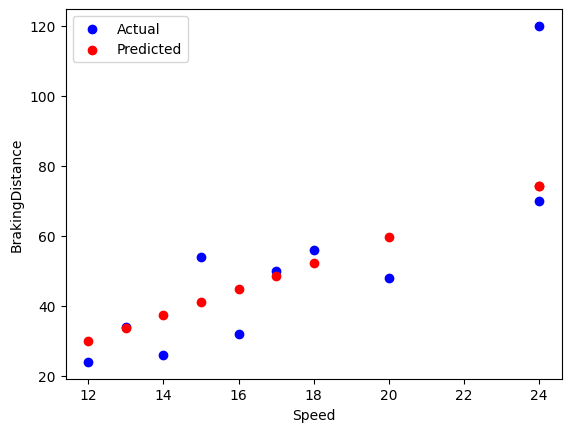

In [67]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

# Calculate R-squared (R2)
r2 = r2_score(y_test, y_pred)
print('R-squared:', r2)

# Plot the actual vs predicted values
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred, color='red', label='Predicted')
plt.xlabel('Speed')
plt.ylabel('BrakingDistance')
plt.legend()
plt.show()


In [69]:
import joblib

# Save the trained model to a file
joblib.dump(model, 'linear_regression_model.pkl')


['linear_regression_model.pkl']

In [68]:
# prompt: save the model

import joblib

# Save the trained model to a file
joblib.dump(model, "linear_regression_model.joblib")

# Print a message to indicate that the model has been saved
print("Model saved successfully!")


Model saved successfully!


**Conclusions**

The linear regression model showed a reasonable fit for predicting braking distance based on speed, as indicated by the MSE and R² metrics.
Speed was found to be a significant predictor of braking distance, consistent with our initial hypothesis based on domain knowledge.
Some outliers were identified in the data, which could be investigated further to understand their cause and potential impact on the model.
**Future Work**

Explore additional features or transformations of existing features that might improve model performance.
Consider using more complex models (e.g., polynomial regression, decision trees, or ensemble methods) to potentially capture nonlinear relationships and improve predictive accuracy.
Gather more data to improve the robustness of the model and validate its performance on a larger dataset.
Perform hyperparameter tuning to optimize the model further and achieve better results.